### Criado 16/08 
# Refazer plots e organizar infos

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import seaborn as sns
from matplotlib import rc
import scipy.stats as stats

#import pandas_profiling

#import json
#import scipy.special
#import networkx as nx

In [2]:
profile.to_file(output_file="profile_output_df5.html")

NameError: name 'profile' is not defined

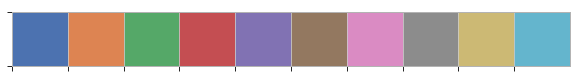

In [2]:
# style
sns.set_style("whitegrid", {'xtick.bottom': True, 'ytick.left': True, 
                            'font.family': ['Liberation Sans'], 'axes.edgecolor': '0.7',
                            'grid.color': '.8'})
sns.set_context('paper')

flatui = ["#44bfaa","#9b59b6", "#e74c3c", "#34495e", "#3498db", "#95a5a6"]
flatui_original = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
colors = ["windows blue",  "faded green" ,"dusty purple", "faded red", "dark yellow", "greyish"]

sns.set_palette('deep')
sns.palplot(sns.color_palette())

c = sns.color_palette()


In [3]:
#colors
pink = sns.xkcd_rgb["rose red"]
green = sns.xkcd_rgb["jade green"]
red = sns.xkcd_rgb["deep red"]
blue = sns.xkcd_rgb["sapphire"]
grey = sns.xkcd_rgb["dark grey"]
lightgrey = sns.xkcd_rgb["light grey"]
navy = sns.xkcd_rgb["navy blue"]
newblue = sns.xkcd_rgb["light royal blue"]
rosered = sns.xkcd_rgb["rose red"]
bluegreen = sns.xkcd_rgb["blue green"]

pal = [pink,green,red,blue,grey,lightgrey,navy,newblue,rosered,bluegreen]

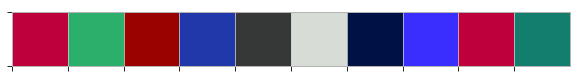

In [227]:
sns.palplot(pal)

In [5]:
def set_other_plot_default_stuff(ax):
    
    ax.legend(fontsize = 11,frameon = True, markerscale = 1)
    ax.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
    ax.set_axisbelow(True)

    plt.xticks(fontsize = 11)
    plt.yticks(fontsize = 11)
    
    ax.xaxis.label.set_size(13)
    ax.yaxis.label.set_size(13)
    

In [4]:
def ticks_font(size = 11):
    plt.xticks(fontsize = size)
    plt.yticks(fontsize = size)

def label_size(ax, size = 13):
    ax.xaxis.label.set_size(size)
    ax.yaxis.label.set_size(size)
    
def legend_format(ax, size = 11):
    ax.legend(fontsize = size, frameon = True, markerscale = 1)

def grid(ax):
    ax.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5)

### To do:
    - carregar dados de /results/
    - arquivos com dados em bins?
    - caregar multiplos n para 100
    - acabar plot de 4 paineis
    - histograma

## Carregar dados

DataFrame com dados das redes:


    - Modularidade
    - 3 heurísticos
    - Ponto Ótimo
    - Média de Ataques
    - Razão média e ponto ótimo

| Nome | O que é |< k >|N|n| Uso |
| --- | --- | --- | --- | --- | --- |
| df_main | Métricas | 3 | 100 | 5 | Fazer médias, AV/OP |
| df_main_means, std | Médias Métricas / Std | 3 | 100 | 5 | Smoothing |
| roll, std | Médias Métricas Suaves / Std | 3 | 100 | 5 | Medidas vs Q, Linhas p histograma |
| df_0X | Métricas n | 3 | 100 | 3, 4, 5, 6 | Médias |
| df_0X_means, std | Médias/Std Métricas | 3 | 100 | 3, 4, 5, 6 | Smmoothing |
| roll_0X, std | Médias Métricas Suaves / Std | 3 | 100 | 3, 4, 5, 6 | Medidas vs Q, Linhas p histograma |
| df_mainX | Métricas | 3, 4, 6 | 100 | 5 | Fazer médias, ?? |
| df_main_meansX, std | Médias Métricas | 3, 4, 6 | 100 | 5 | Smoothing |
| roll_X, std | Médias Métricas Suaves / Std | 3, 4, 6 | 100 | 5 | Medidas vs Q |
| df_main_X, std | Métricas | 3 | 80, 120 | 4, 6 | Scaling |
| df_main_means_X, std | Médias/Std | 3 | 80, 120 | 4, 6 | ?? |
| bf_df | LCC | 3 | 100 | 5 | Histogramas, prob cumulativa |


#### N = 100

In [4]:
# k = 3 medidas
df_main = pd.read_csv('k_3/networks/results/data_100_5.csv', index_col = 0)
df_main_means = pd.DataFrame({})
df_main_std = pd.DataFrame({})
df_main["HBA/OP"] = round(df_main.HBA/df_main.OP,3)
df_main["MBA/OP"] = round(df_main.MBA/df_main.OP,3)
df_main["CI/OP"] = round(df_main.CI/df_main.OP,3)

In [112]:
# n = 3, 4, 5, 6 
# k_3/networks
df_03 = pd.read_csv('k_3/networks/results/data_100_3.csv', index_col = 0)
df_03_means = pd.DataFrame({})
df_03_std = pd.DataFrame({})
df_04 = pd.read_csv('k_3/networks/results/data_100_4.csv', index_col = 0)
df_04_means = pd.DataFrame({})
df_04_std = pd.DataFrame({})
df_05 = pd.read_csv('k_3/networks/results/data_100_5.csv', index_col = 0)
df_05_means = pd.DataFrame({})
df_05_std = pd.DataFrame({})
df_06 = pd.read_csv('k_3/networks/results/data_100_6.csv', index_col = 0)
df_06_means = pd.DataFrame({})
df_06_std = pd.DataFrame({})

#### N = 120

In [10]:
# 120
df_main_120 = pd.read_csv('k_3/networks/results/data_120_6.csv', index_col = 0)
df_main_means_120 = pd.DataFrame({})
df_main_std_120 = pd.DataFrame({})

#### N = 80

In [11]:
# 80
df_main_080 = pd.read_csv('k_3/networks/results/data_080_4.csv', index_col = 0)
df_main_means_080 = pd.DataFrame({})
df_main_std_080 = pd.DataFrame({})

### < k >

In [6]:
# k = 4 e 6

df_main4 = pd.read_csv('k_4/results/data_100_5.csv', index_col = 0)
df_main_means4 = pd.DataFrame({})
df_main_std4 = pd.DataFrame({})

df_main4["HBA/OP"] = df_main4.HBA/df_main4.OP
df_main4["MBA/OP"] = df_main4.MBA/df_main4.OP
df_main4["CI/OP"] = df_main4.CI/df_main4.OP

df_main6 = pd.read_csv('k_6/results/data_100_5.csv', index_col = 0)
df_main_means6 = pd.DataFrame({})
df_main_std6 = pd.DataFrame({})

df_main6["HBA/OP"] = df_main6.HBA/df_main6.OP
df_main6["MBA/OP"] = df_main6.MBA/df_main6.OP
df_main6["CI/OP"] = df_main6.CI/df_main6.OP


## Bins

#### Forma 1

In [ ]:
# K = 3 BINS

width = 0.02

bin_edges = np.arange(0.56, 0.87, width)[1:]
bin_centers = bin_edges - width/2

df_05_std['Q'] = bin_centers
df_05_means['Q'][2:] = bin_centers


for col in df_05.iloc[:,:]:
    binned, _ , _ = stats.binned_statistic(df_05["Q"], df_05[col], 
                                                            bins = np.arange(0.56, 0.87, width))
    binned_std, _ , _ = stats.binned_statistic(df_05["Q"], df_05[col], 
                                                            bins = np.arange(0.56, 0.87, width), statistic="std")
    df_05_means[col] = binned.round(3)
    df_05_std[col] = binned_std.round(3)
    

In [120]:
# k = 4 e 6 BINS

width = 0.02

bin_edges = np.arange(0.56, 0.87, width)[1:]
bin_centers = bin_edges - width/2

df_main_means6['Q'] = bin_centers
df_main_std6['Q'] = bin_centers

for col in df_main6.iloc[:,:]:
    binned, _ , _ = stats.binned_statistic(df_main6["Q"], df_main6[col], 
                                                            bins = np.arange(0.56, 0.87, width))
    binned_std, _ , _ = stats.binned_statistic(df_main6["Q"], df_main6[col], 
                                                            bins = np.arange(0.56, 0.87, width), statistic="std")
    df_main_means6[col] = binned.round(3)
    df_main_std6[col] = binned_std.round(3)
    
# df_main_means6['Q'] = bin_centers
# df_main_std6['Q'] = bin_centers

# for col in df_05.iloc[:,:]:
#     binned, _ , _ = stats.binned_statistic(df_main6["Q"], df_main6[col], 
#                                                             bins = np.arange(0.56, 0.87, width))
#     binned_std, _ , _ = stats.binned_statistic(df_main6["Q"], df_main6[col], 
#                                                             bins = np.arange(0.56, 0.87, width), statistic="std")
#     df_main_means6[col] = binned.round(3)
#     df_main_std6[col] = binned_std.round(3)

/home/usuario/anaconda2/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:563: RuntimeWarning: invalid value encountered in sqrt
  (flatsum[a] / flatcount[a]) ** 2)


#### Forma 2

Medias n = 3, 4, 5, 6

In [111]:
# n 

intervals = pd.interval_range(0.52,0.90,freq=0.02)
bin_edges = np.arange(0.50, 0.87, width)[1:]
bin_centers = bin_edges - width/2

df_03_means = df_03.groupby(pd.cut(df_03.Q, bin_edges), as_index=False).mean().round(3).dropna()
df_03_std = df_03.groupby(pd.cut(df_03.Q, bin_edges), as_index=False).std().round(3).dropna()
#df_03_means["Q"] = bin_centers[1:]

df_04_means = df_04.groupby(pd.cut(df_04.Q, bin_edges), as_index=False).mean().round(3).dropna()
df_04_std = df_04.groupby(pd.cut(df_04.Q, bin_edges), as_index=False).std().round(3).dropna()
df_04_means["Q"] = bin_centers[1:]

df_05_means = df_05.groupby(pd.cut(df_05.Q, bin_edges), as_index=False).mean().round(3).dropna()
df_05_std = df_05.groupby(pd.cut(df_05.Q, bin_edges), as_index=False).std().round(3).dropna()
#df_05_means["Q"] = bin_centers[1:]

df_06_means = df_06.groupby(pd.cut(df_06.Q, bin_edges), as_index=False).mean().round(3).dropna()
df_06_std = df_06.groupby(pd.cut(df_06.Q, bin_edges), as_index=False).std().round(3).dropna()
df_06_means["Q"] = bin_centers[1:][9:]

NameError: name 'width' is not defined

#### Smoothing

In [48]:
# k = 3 rolling 

roll = df_05_means.rolling(window=2).mean().sort_values(by='Q')
roll.dropna(inplace = True)
rollstd = df_05_std.rolling(window=2).mean().sort_values(by='Q')
rollstd.dropna(inplace = True)

In [123]:
# k = 4 e 6 rolling

roll4 = df_main_means4.rolling(window=2).mean().sort_values(by='Q')
roll4.dropna(inplace = True)
rollstd4 = df_main_std4.rolling(window=2).mean().sort_values(by='Q')
rollstd4 = rollstd4.loc[roll4.index]

roll6 = df_main_means6.rolling(window=2).mean().sort_values(by='Q')
roll6.dropna(inplace = True)
rollstd6 = df_main_std6.rolling(window=2).mean().sort_values(by='Q')
rollstd6 = rollstd6.loc[roll6.index]

In [125]:
roll6

,Q,OP,Average,AV/OP,MBA,HBA,CI,HBA/OP,MBA/OP,CI/OP
4,0.6405,0.9070,0.9475,1.0445,0.9500,0.9415,0.9500,1.0385,1.0480,1.0480
5,0.6535,0.9035,0.9455,1.0465,0.9500,0.9500,0.9500,1.0520,1.0520,1.0520
6,0.6755,0.9010,0.9415,1.0450,0.9500,0.9500,0.9500,1.0545,1.0545,1.0545
7,0.7000,0.8915,0.9360,1.0500,0.9500,0.9500,0.9500,1.0655,1.0655,1.0655
8,0.7210,0.8815,0.9410,1.0680,0.9500,0.9450,0.9500,1.0720,1.0780,1.0780
9,0.7410,0.8780,0.9500,1.0825,0.9500,0.9450,0.9500,1.0765,1.0825,1.0825
10,0.7585,0.8550,0.9495,1.1115,0.9440,0.9440,0.9500,1.1050,1.1050,1.1120
11,0.7775,0.8090,0.9480,1.1750,0.9280,0.9250,0.9500,1.1455,1.1495,1.1775
12,0.8000,0.7050,0.9410,1.3795,0.9070,0.8150,0.9500,1.1650,1.3250,1.3945
13,0.8235,0.5175,0.9165,1.9795,0.7505,0.6215,0.8925,1.2395,1.4780,1.8415


Medias n = 3, 4, 5, 6

In [99]:
# n smoothing

roll03 = df_03_means.rolling(window=2).mean().sort_values(by='Q').dropna()
rollstd03 = df_03_means.rolling(window=2).std().sort_values(by='Q').dropna()

roll04 = df_04_means.rolling(window=2).mean().sort_values(by='Q').dropna()
rollstd04 = df_04_means.rolling(window=2).std().sort_values(by='Q').dropna()

roll05 = df_05_means.rolling(window=2).mean().sort_values(by='Q').dropna()
rollstd05 = df_05_means.rolling(window=2).std().sort_values(by='Q').dropna()

# roll06 = df_06_means.rolling(window=2).mean().sort_values(by='Q').dropna()
# rollstd06 = df_06_means.rolling(window=2).std().sort_values(by='Q').dropna()

#### Brute Force LCC sizes
    - For histogram

In [18]:
# todos resultados bruteforce k = 3

files_bruteforce_results = sorted(glob.glob("k_3/networks/100/mu*/net*/gcn5*"))

bf_df = pd.DataFrame({}, index = range(1,96))

cols = sorted(df_main.index)

for i,file in enumerate(files_bruteforce_results):
    x = np.loadtxt(file, max_rows=95,dtype=int)
    bf_df[cols[i]] = x
    
x=((bf_df.sum(axis=0))-75287520.0)
x = x[x!=0].index
#x = x[x==1.0]
bf_df = bf_df.transpose()
bf_df[95].loc[x] = bf_df[95].loc[x] - 1
bf_df = bf_df.transpose()
    
#bf_df=bf_df.transpose()

In [25]:
cols = df_main[df_main.Q>0.81][df_main.Q<0.83].index

/home/usuario/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [158]:
def percents(df):
    delta = [0.25,0.50,0.75]
    res = []
    
    for value in delta:
        res.append(df.quantile(delta))
    
    

In [29]:
cumulative = bf_df.iloc[:,0].cumsum(axis=0)
max(cumulative.nonzero())-min(cumulative.nonzero())


/home/usuario/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  


(array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
        86, 87, 88, 89, 90, 91, 92, 93, 94]),)

In [171]:
q1 = sum(bf082.iloc[:quart])
q2 = sum(bf082.iloc[quart:quart*2])
q3 = sum(bf082.iloc[quart*2: quart*3])
q4 = sum(bf082.iloc[quart*3:])

In [191]:
100*(q1+q2+q3)/qs

29.224654211767607

In [141]:
bf082 = bf_df[cols].sum(axis=1)[16:]

In [142]:
bf082 = (bf082/(len(cols)))

In [33]:
files_bruteforce_results = sorted(glob.glob("k_6/mu*/net*/gcn5*"))

bf_df = pd.DataFrame({}, index = range(1,96))

cols = sorted(df_main.index)

for i,file in enumerate(files_bruteforce_results):
    x = np.loadtxt(file, max_rows=95,dtype=int)
    bf_df[cols[i]] = x

## Figuras

#### Plot principal

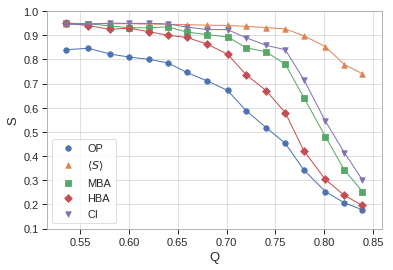

In [95]:
# k = 3 rolling vs Q

df = mean_roll

fig, ax = plt.subplots()

markers = ['o', '^', 's', 'D', 'v']

for i, col in enumerate(df[['OP','Average', 'MBA', 'HBA', 'CI']]):
    ax.plot(df['Q'], df[col],lw = 1, label='_nolegend_')
    if col == 'Average':
        ax.scatter(df['Q'], df[col], s=30, marker = markers[i], label = r'$\langle S \rangle$')
    else:
        ax.scatter(df['Q'], df[col], s=30, marker = markers[i])

ax.set_ylim([0.1,1.0])
ax.set_xlabel("Q")
ax.set_ylabel("S")
set_other_plot_default_stuff(ax)
#ax.legend(loc = 5, framealpha=0.5)
#ax.grid(False)
#fig.savefig('figs_dissertacao/main_plot_k6_n4.png', dpi = 300, bbox_inches='tight')

#### Cinco juntos: OP, Av, MBA, HBA, CI com desvio padrão

/home/usuario/anaconda2/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


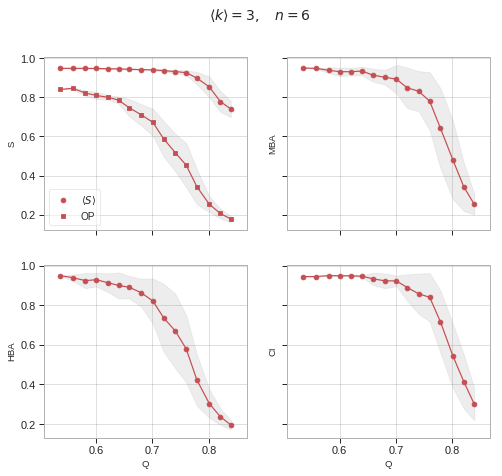

In [93]:
# plot extendido com std

df = mean_roll
dfstd = std_roll

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize = (8,7))

plt.xticks(fontsize = 11)
fig.suptitle(r"$\langle k \rangle = 3, \quad n=6$", fontsize=14)

x1 = 0.573
x2 = 0.85

c1 = c[3]
c2 = c[-3]

ax1.scatter(df['Q'],df["Average"], color = c1, label = r'$\langle S \rangle$', zorder = 10)
ax1.plot(df['Q'],df["Average"], color = c1, label = "_nolegend_", zorder = 9)
ax1.fill_between(df['Q'], df['Average']-dfstd['Average'], df['Average']+dfstd['Average'], color=c2, alpha=0.15)

ax1.scatter(df['Q'],df["OP"], color = c1, label = "OP",marker = "s", zorder = 10)
ax1.plot(df['Q'],df["OP"], color = c1, label = "_nolegend_", zorder = 9)
ax1.fill_between(df['Q'], df['OP']-dfstd['OP'], df['OP']+dfstd['OP'], color=c2, alpha=0.15, label = "_nolegend_")

ax1.set_ylabel('S')
#ax1.set_xlim(x1,x2)
ax1.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
ax1.legend(fancybox=True, framealpha=0.5, loc=3, fontsize = 10)

ax2.scatter(df['Q'],df['MBA'], color = c1, label = "_nolegend_", zorder = 10)
ax2.plot(df['Q'],df['MBA'], color = c1, label = "_nolegend_", zorder = 9)
ax2.fill_between(df['Q'], df['MBA']-dfstd['MBA'], df['MBA']+dfstd['MBA'], color=c2, alpha=0.15, label = "_nolegend_")
ax2.set_ylabel('MBA', labelpad = 10)
#ax2.set_xlim(x1,x2)
ax2.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5)

ax3.scatter(df['Q'],df['HBA'], color = c1, label = "_nolegend_", zorder = 10)
ax3.plot(df['Q'],df['HBA'], color = c1, label = "_nolegend_", zorder = 9)
ax3.fill_between(df['Q'], df['HBA']-dfstd['HBA'], df['HBA']+dfstd['HBA'], color=c2, alpha=0.15, label = "_nolegend_")
ax3.set_xlabel('Q')
ax3.set_ylabel('HBA')
#ax3.set_xlim(x1,x2)
ax3.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5)

ax3.tick_params("x", labelsize = 11)
ax3.tick_params("y", labelsize = 11)
ax1.tick_params("y", labelsize = 11)

ax4.scatter(df['Q'],df['CI'], color = c1, label = "_nolegend_", zorder = 10)
ax4.plot(df['Q'],df['CI'], color = c1, label = "_nolegend_", zorder = 9)
ax4.fill_between(df['Q'], df['CI']-dfstd['CI'], df['CI']+dfstd['CI'], color=c2, alpha=0.15, label = "_nolegend_")
ax4.set_xlabel('Q')
ax4.set_ylabel('CI', labelpad = 10)
#ax4.set_xlim(x1,x2)
ax4.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5)

fig.tight_layout(pad = 70)

#fig.savefig('figs_dissertacao/subplots_k3_n6.png', dpi=300,bbox_inches='tight')

#### Scaling n = 3, 4, 5, 6

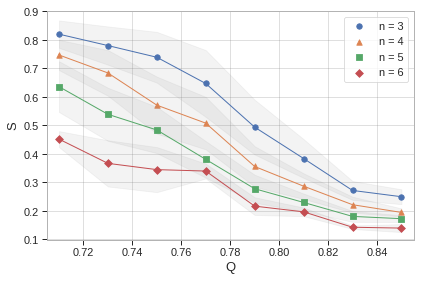

In [154]:
# k = 3, n

fig, ax = plt.subplots()

c1 = c[3]
c2 = c[-3]
markers = ['o', '^', 's', 'D', 'v']

dfs = [df_03_means.iloc[9:], df_04_means.iloc[9:], df_05_means.iloc[9:], df_06_means]
stds = [df_03_std.iloc[-8:], df_04_std.iloc[-8:], df_05_std.iloc[-8:], df_06_std]

for i,df in enumerate(dfs):
    ax.fill_between(df['Q'], df['OP'] - stds[i]['OP'], df['OP'] + stds[i]['OP'], color=c2, alpha=0.1)
    ax.plot(df['Q'], df["OP"], lw = 1, label='_nolegend_')
    ax.scatter(df['Q'], df["OP"], s=30, marker = markers[i], label = "n = " + str(i+3))

ax.set_xlim([0.705, 0.855])
ax.set_ylim([0.1, 0.9])

ax.set_ylabel('S')
ax.set_xlabel('Q')

set_other_plot_default_stuff(ax)

fig.tight_layout()

#plt.savefig('k_3/figs_dissertacao/scaling_100_n.png', dpi = 300, bbox_inches='tight')

#### Scaling 80, 100, 120

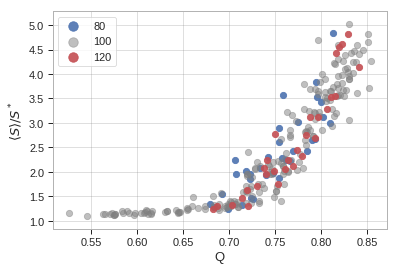

In [38]:
# Av/OP N

fig, ax = plt.subplots()

ax.set_xlabel("Q")
ax.set_ylabel(r"$\langle S \rangle / S^*$")

c = sns.color_palette()

ax.scatter(df_main_080["Q"], df_main_080["AV/OP"], alpha = 0.9, label = "80", s=40)
ax.scatter(df_main["Q"], df_main["AV/OP"], alpha = 0.5, label = "100", s=40, color = "grey")
ax.scatter(df_main_120["Q"], df_main_120["AV/OP"], alpha = 0.9, label = "120", s=40, color=c[3])

set_other_plot_default_stuff(ax)

ax.legend(fontsize = 11,frameon = True, markerscale = 1.5)

#ax.grid(False)

fig.savefig('figs_dissertacao/scalingN.png', dpi=300, bbox_inches='tight')

#### Regressão linear Av/OP

In [135]:
crossing(df_main4, 'Q', 'AV/OP', 55, 65)

1.3484741679835834


0.709

In [132]:
# regressao linear

x1 = df_main['Q'].iloc[:55]
y1 = df_main['AV/OP'].iloc[:55]
x2 = df_main['Q'].iloc[55:]
y2 = df_main['AV/OP'].iloc[55:]

x = df_main['Q'].iloc[:65]

r1 = stats.linregress(x1,y1)
func1 = r1[0] *x + r1[1]

r2 = stats.linregress(x2,y2)
func2 = r2[0] *x2 + r2[1]

cross = (r2[1] - r1[1])/(r1[0] - r2[0])
round(cross,3)

0.709

In [144]:
r1[0] *0.712 + r1[1]

1.3531877960115097

In [34]:
def crossing(df, x, y, div, xlim):
    from scipy.stats import linregress
    
    x1 = df[x].iloc[:div]
    y1 = df[y].iloc[:div]
    x2 = df[x].iloc[div:]
    y2 = df[y].iloc[div:]

    x_func = df[x].iloc[:xlim]

    r1 = linregress(x1,y1)
    func1 = r1[0] *x_func + r1[1]

    r2 = linregress(x2,y2)
    func2 = r2[0] *x2 + r2[1]

    cross = (r2[1] - r1[1])/(r1[0] - r2[0])
    print(df['Q'].iloc[div], r1[0] * round(cross,3) + r1[1])
    
    return round(cross,3), r1, r2

In [6]:
# Encontrar Q críticos para cada separacao da modularidade em dois 

reg1 = pd.DataFrame({}, columns=["slope", "intercept", "r_value", "p_value", "std_err"])
reg2 = pd.DataFrame({}, columns=["slope", "intercept", "r_value", "p_value", "std_err"])    
q_critical = []

for i in range(2,len(df_main)-1):
    x_1 = df_main['Q'][:i]
    x_2 = df_main['Q'][i:]
    y_1 = df_main['AV/OP'][:i]
    y_2 = df_main['AV/OP'][i:]
    
    r1 = stats.linregress(x_1,y_1)
    r2 = stats.linregress(x_2,y_2)
    
    reg1.loc[len(reg1), :] = list(r1)
    reg2.loc[len(reg2), :] = list(r2)
    
    cross = (r2[1] - r1[1])/(r1[0] - r2[0])
    q_critical.append(round(cross,3))

reg1["r_square"] = reg1["r_value"]**2
reg2["r_square"] = reg2["r_value"]**2

In [45]:
reg1 = pd.DataFrame({}, columns=["slope", "intercept", "r_value", "p_value", "std_err"])
reg2 = pd.DataFrame({}, columns=["slope", "intercept", "r_value", "p_value", "std_err"])    
q_critical = []

for i in range(2,len(df_main6)-1):
    res = crossing(df_main6, 'Q', 'AV/OP', i, 65)
    q_critical.append(res[0])
    
    reg1.loc[len(reg1), :] = list(res[1])
    reg2.loc[len(reg2), :] = list(res[2])

reg1["r_square"] = reg1["r_value"]**2
reg2["r_square"] = reg2["r_value"]**2

0.64 1.3319999999999996
0.642 1.1699230769230755
0.643 1.083735294117646
0.6459999999999999 1.0912892561983467
0.6459999999999999 1.0736045197740114
0.649 1.0675925349922242
0.6509999999999999 1.0884314516129034
0.6609999999999999 1.065599187542316
0.6829999999999999 1.0631097099621694
0.684 1.036357619526465
0.684 1.0504406335907843
0.698 1.0566187995303788
0.7 1.0429667309717967
0.705 1.0366753247864713
0.7070000000000001 1.0480872760915936
0.708 1.042937434722208
0.711 1.042063204158672
0.713 1.0374557480927697
0.713 1.0478381165270438
0.715 1.0564404057003465
0.728 1.0598129749225134
0.728 1.0625861131891114
0.73 1.0581232629208575
0.735 1.0607682653733135
0.737 1.0740529261711544
0.7440000000000001 1.078840318105743
0.745 1.0828314333476337
0.75 1.0865385756286388
0.754 1.0856491587609087
0.758 1.0847799744553028
0.7609999999999999 1.090782551906006
0.762 1.0996703042243574
0.763 1.1110017377953663
0.773 1.1203026177483153
0.775 1.1193099435079046
0.7829999999999999 1.119922099920

In [55]:
(abs(reg1['r_value'] - reg2['r_value'])).sort_values()

49    0.0144225
48     0.067009
47     0.136495
1      0.194354
40     0.202437
41     0.221723
46     0.223323
39     0.224861
0      0.226535
3      0.227578
6      0.231794
38     0.239549
35     0.242119
33     0.249053
34     0.250194
37     0.253551
45     0.260051
50     0.260309
32     0.265319
36     0.267646
44     0.277481
31     0.280756
43     0.308643
30     0.315139
42     0.329612
2      0.329639
27     0.351133
28     0.355538
29     0.359769
4      0.360584
26     0.385475
5      0.426092
25     0.430808
24     0.481243
8      0.481765
11     0.494137
51     0.512943
7      0.521735
21     0.549786
23     0.592409
20     0.604725
22      0.63821
54     0.650352
19     0.655906
52     0.665181
10     0.669826
53     0.724598
14     0.769482
18     0.800237
15     0.911964
12     0.912529
16     0.942989
17      1.07229
9       1.07691
13      1.10823
55      1.29775
57      1.44901
56      1.45576
58      1.61155
59      1.74847
Name: r_value, dtype: object

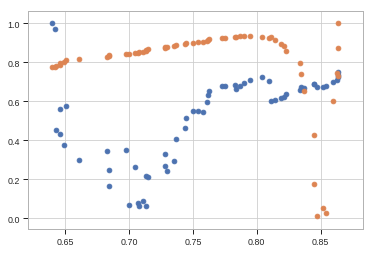

In [84]:
plt.scatter(df_main6['Q'].iloc[2:62], abs(reg1['r_value']))
reg2rev = list(abs(reg2['r_value']))
#reg2rev.reverse()
plt.scatter(df_main6['Q'].iloc[2:62], reg2rev)

In [91]:
max(abs(reg1['r_value'])[2:])

0.748474351949667

In [ ]:
plt.scatter(df_main6['Q'], df_main6['AV/OP'])

In [81]:
((list(abs(reg2['r_value']))).reverse())

TypeError: 'NoneType' object is not iterable

In [37]:
# x e y para plotar

n = 54 #linha do melhor Q crítico

x1 = df_main['Q'].iloc[:70]
x2 = df_main['Q'][50:]
reta1 = reg1.iloc[n][0]*x1 + reg1.iloc[n][1]
reta2 = reg2.iloc[n][0]*x2 + reg2.iloc[n][1]

NameError: name 'df_main' is not defined

In [146]:
# valor crítico de modularidade
#print(reg1.r_value[58])
#q_critical[58]
print(reg1.r_value[52])
q_critical[52]

0.7480433995250321


0.712

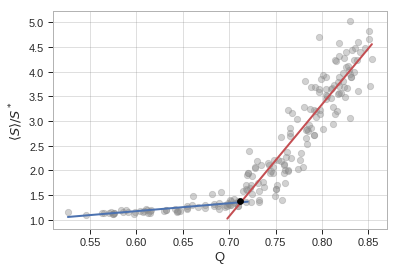

In [150]:
# plot duas retas

fig, ax = plt.subplots()

ax.set_xlabel("Q")
ax.set_ylabel(r"$\langle S \rangle / S^*$")

#ax.scatter(0.724,1.46, c="black", s=35,zorder=10)
ax.scatter(0.712,1.39, c="black", s=35,zorder=10)
ax.scatter(df_main["Q"], df_main["AV/OP"], alpha = 0.4, s=40, color = c[-3])

ax.plot(x1,reta1, lw=2)
ax.plot(x2,reta2,c=c[3], lw=2)

set_other_plot_default_stuff(ax)

ax.get_legend().remove()

#fig.savefig('figs_dissertacao/ratio_AV_OP.png', dpi=300, bbox_inches='tight')

KeyError: 'CI/OP'

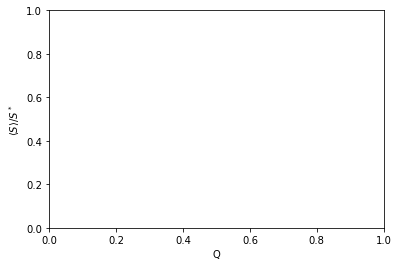

In [51]:
fig, ax = plt.subplots()

ax.set_xlabel("Q")
ax.set_ylabel(r"$\langle S \rangle / S^*$")

#ax.scatter(0.724,1.46, c="black", s=35,zorder=10)
#ax.scatter(0.712,1.39, c="black", s=35,zorder=10)
#ax.scatter(df_main["Q"][ df_main["HBA/OP"] < 2.0], df_main["HBA/OP"][ df_main["HBA/OP"] < 2.0], alpha = 0.4, s=40)
#ax.scatter(df_main["Q"][ df_main["MBA/OP"] < 2.0], df_main["MBA/OP"][ df_main["MBA/OP"] < 2.0], alpha = 0.4, s=40)
ax.scatter(df_05_means["Q"], df_05_means["CI/OP"], alpha = 0.4, s=40)


set_other_plot_default_stuff(ax)

ax.get_legend().remove()

#### Tentativa fit polinomial

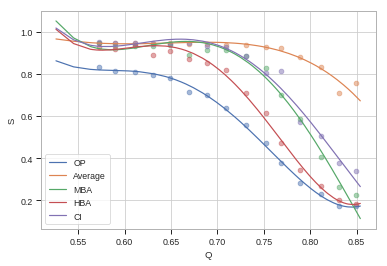

In [68]:
# TENTATIVA SERIO

columns = df_main.columns.drop(["Q","AV/OP"])
for col in columns:
    x = np.array(df_main['Q'])
    y = np.array(df_main[col])
    z = np.polyfit(x, y, 4)
    p = np.poly1d(z)
    plt.plot(x,p(x), label = col)
    x = np.array(df_main_means['Q'])
    y = np.array(df_main_means[col])
    plt.scatter(x,y,alpha = 0.5)

plt.legend()
plt.xlabel("Q")
plt.ylabel("S")

plt.savefig("figs_dissertacao/regress_pontos.png", dpi=300)
#plt.savefig("figs_dissertacao/regress.png", dpi=300)

### < k >

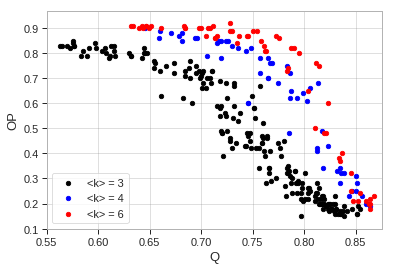

In [50]:
# testes com < k > 

fig, ax = plt.subplots()
medida = "OP"
df_main.plot.scatter("Q", medida, ax=ax, c="black",label="<k> = 3")
df_main4.plot.scatter("Q", medida,ax=ax, c="blue",label="<k> = 4")
df_main6.plot.scatter("Q", medida,ax=ax,c="red",label="<k> = 6")
ax.set_xlim([0.55,0.875])
set_other_plot_default_stuff(ax)
#fig.savefig("k_medios_"+medida+".png", dpi=300)

#### Cumulative Distribution

In [28]:
# todos resultados bruteforce k = 3

files_bruteforce_results = sorted(glob.glob("k_3/networks/100/mu*/net*/gcn5*"))
bf_df = pd.DataFrame({}, index = range(1,96))

cols = sorted(df_main.index)

for i,file in enumerate(files_bruteforce_results):
    x = np.loadtxt(file, max_rows=95,dtype=int)
    bf_df[cols[i]] = x
    
x=((bf_df.sum(axis=0))-75287520.0)
x = x[x!=0].index
bf_df = bf_df.transpose()
bf_df[95].loc[x] = bf_df[95].loc[x] - 1
bf_df = bf_df.transpose()

bf_df3 = bf_df
bf_df_prob = bf_df.mean(axis=1)/75287520
bf_cumulative3 = bf_df_prob.cumsum()

##################################################################
files_bruteforce_results = sorted(glob.glob("k_6/mu*/net*/gcn5*"))
bf_df = pd.DataFrame({}, index = range(1,96))

cols = sorted(df_main.index)

for i,file in enumerate(files_bruteforce_results):
    x = np.loadtxt(file, max_rows=95,dtype=int)
    bf_df[cols[i]] = x
    
bf_df6 = bf_df

bf_df_prob = bf_df.mean(axis=1)/75287520
bf_cumulative6 = bf_df_prob.cumsum()

# #################################################################
# files_bruteforce_results = sorted(glob.glob("k_4/net*/gcn5*"))
# bf_df = pd.DataFrame({}, index = range(1,96))

# cols = sorted(df_main.index)

# for i,file in enumerate(files_bruteforce_results):
#     x = np.loadtxt(file, max_rows=95,dtype=int)
#     bf_df[cols[i]] = x
    
# bf_df4 = bf_df
# bf_df_prob = bf_df.mean(axis=1)/75287520
# bf_cumulative4 = bf_df_prob.cumsum()
#bf_df=bf_df.transpose()

In [26]:
# probabilidades e prob cumulativa

#bf_df_mean = bf_df.mean(axis=1).iloc[bf_df.sum(axis=1).to_numpy().nonzero()]
bf_df_prob = bf_df.mean(axis=1)/75287520
bf_cumulative = bf_df_prob.cumsum()
#bf_cumulative = bf_cumulative.iloc[bf_cumulative.to_numpy().nonzero()]

In [22]:
# rascunho plot cumulativo
def plot_cumulativa(df, name, save=False, col = newblue, xlim=[7,97]):
    
    fig, ax = plt.subplots(figsize=(5,4))

    # k=["80","100","120"]
    # for i,df in enumerate([bf_cumulative080,bf_cumulative100,bf_cumulative120]):
    #     df.rolling(window=2).mean().plot(logy=True, ax=ax,lw=2, label = "N = "+k[i])

    df.rolling(window=2).mean().plot(logy=True, ax=ax,lw=2, color = col, alpha=0.7)

    ax.set_ylabel("Probabilidade Cumulativa")
    ax.set_xlabel("S")

    ticks_font()
    label_size(ax)
    grid(ax)

    ax.set_xticks(np.arange(10,100,10))
    ax.set_xticklabels(np.arange(10,100,10))

    ax.set_xlim(xlim)

    fig.tight_layout()
    if save:
        fig.savefig(name, dpi=600)

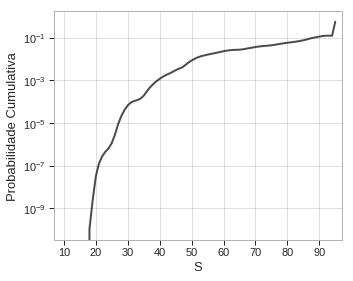

In [32]:
plot_cumulativa(bf_cumulative3, "figs_dissertacao/prob_cumul_teste.png")

### Quarter

In [386]:
quarter = 75287520*0.25

In [387]:
for i,n in enumerate(bf_df.mean(axis=1).cumsum()):
    if n > quarter:
        print(i-1, oldn, i, n)
        break
    oldn = n

87 18158027.050505057 88 20091378.409090914


## Histogramas

In [5]:
def get_OP_Q_from_df(df, network, N):
    op = df['OP'].loc[network]
    q = df['Q'].loc[network]
    return int(op*N), round(q,3)

def get_heurs_from_df(df, network, N):
    hba = df['HBA'].loc[network]
    mba = df['MBA'].loc[network]
    ci = df['CI'].loc[network]
    average = df['Average'].loc[network]
    return int(hba*N), int(mba*N), int(ci*N), int(round(average*N,0))

In [30]:
for line in get_heurs_from_df(df, names[i],N[i]):
    print(line)

29
51
93
106


No handles with labels found to put in legend.


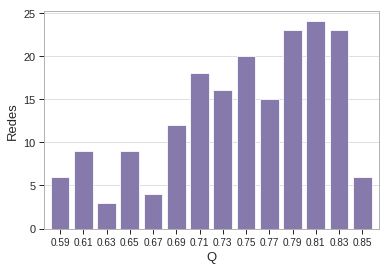

In [51]:
# numero de redes por modularidade
bin_edges = np.arange(0.56, 0.87, 0.02)[1:]
y = np.histogram(df_main.Q, bins=bin_edges)[0]
x = (bin_edges[1:] + bin_edges[:-1])/2

fig, ax = plt.subplots()
set_other_plot_default_stuff(ax)
sns.barplot(np.round(x,2),y,ax=ax, color=sns.color_palette()[4])
#ax.set_xticklabels()
ax.tick_params(axis="x", labelsize=10)
ax.set_ylabel("Redes")
ax.set_xlabel("Q")

ax.set_xlim([-0.7,13.7])
#ax.set_ylim([0.0,25])
ax.get_legend().remove()
#fig.savefig("k_3/figs_dissertacao/Qhistogram.png", dpi=300)

In [10]:
files_bruteforce_results = sorted(glob.glob("k_3/networks/080/net*/gcn4*"))
bf_df = pd.DataFrame({}, index = range(1,77))

cols = sorted(df_main_080.index)

for i,file in enumerate(files_bruteforce_results):
    x = np.loadtxt(file, max_rows=76,dtype=int)
    bf_df[cols[i]] = x
    
bf_df080 = bf_df
#bf_df_prob = bf_df.mean(axis=1)/75287520
#bf_cumulative4 = bf_df_prob.cumsum()
#################################################
files_bruteforce_results = sorted(glob.glob("k_3/networks/120/net*/gcn6*"))
bf_df = pd.DataFrame({}, index = range(1,115))

cols = sorted(df_main_120.index)

for i,file in enumerate(files_bruteforce_results):
    x = np.loadtxt(file, max_rows=114,dtype=int)
    bf_df[cols[i]] = x
    
bf_df120 = bf_df


In [13]:
q_075 = ["net34", "mu02/net30", "net09"]
q_68 = ["net20", "mu03/net20","net30"]
q_81 = ["net11", "mu07/net33","net26"]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


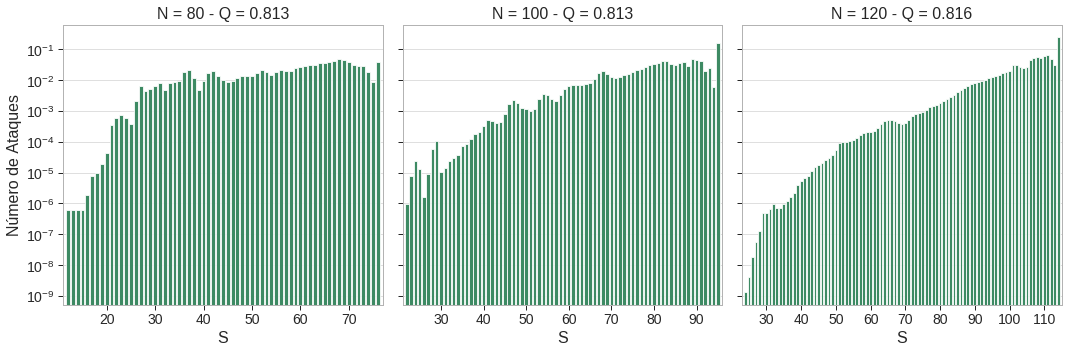

In [26]:
names = q_81
dfs = [(df_main_080, bf_df080), (df_main, bf_df), (df_main_120, bf_df120)]
N = [80,100,120]
lt = ['--', '-.', ':','-']
verde = "#3d8a63"

fig, ax = plt.subplots(1,3, figsize=(15,5),tight_layout=True, sharey = True)

for i, name in enumerate(names):
    
#     for line in get_heurs_from_df(df_main, names[2],100):
#         line = dataHeuristics.iloc[38, col+1]
#         ax[i].axvline(z-1, linestyle = lt[col], color='#333333', lw = 2, label = dataHeuristics.columns[col+1])
    
    op, q = get_OP_Q_from_df(dfs[i][0], name, N[i])
    
    comb = dfs[i][1].sum()[0]
    
    dist_data = (dfs[i][1][name][op-1:])/comb
    x = list(dist_data.index)

    ax[i].bar(x, dist_data, color=verde)
    ax[i].set_yscale("log")

    start_tick = op - op%10 + 10 
    xticks = np.arange(start_tick ,len(dfs[i][1]) + 1, 10, dtype = int)

    ax[i].set_xlim([op-1, len(dfs[i][1]) + 1])
    ax[i].set_xticks(xticks)
    ax[i].set_xticklabels(xticks)
    
    ax[i].tick_params(labelsize = 14)
    set_other_plot_default_stuff(ax[i])
    ax[i].set_xlabel("S", fontsize=16)


    
    ax[i].grid(b = False, axis = "x")
    ax[i].get_legend().remove()
    
    ax[i].set_title("N = " + str(N[i]) + " - Q = " + str(q), fontsize = 16)
    
#    ax[i].text(op,10**7, q)
#plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

ax[0].set_ylabel("Número de Ataques", fontsize = 16)
plt.minorticks_off()
fig.savefig("figs_dissertacao/histograma_triplo_N_Qalto.png", dpi=300)

## Ideia:

Barplot com quadrantes

### Número de sets ótimos

In [35]:
sets = np.loadtxt("k_3/networks/100/ops_5.dat", delimiter=' ', dtype = str)
sets = sets.T

In [36]:
ops = sorted(sets[1].astype(int))

In [104]:
df_main_smaller = df_main.sort_values(by = 'names')

In [37]:
df_main["ops"] = ops

In [106]:
df_main_smaller = df_main_smaller.drop(['mu07/net37', 'mu07/net38', 'mu00/net10','mu07/net39','mu00/net06', 'mu00/net07', 'mu00/net08', 'mu00/net09', 'mu00/net11'])

In [38]:
n = 20
cut = pd.cut(df_main['Q'],np.arange(0.52,0.87,0.02),retbins=True)
#cut = pd.cut(df_main['Q'],n,retbins=True)

df_main['cut'] = cut[0]
df_main['cut_midpoint'] = df_main['cut'].apply(lambda x: x.mid)

In [98]:
df_main_smaller.drop(df_main_smaller.index[:5], inplace=True)


In [258]:
np.median(df_main['ops'][df_main['ops'] <=2])

1.0

In [259]:
IQR = 3

In [260]:
4 + 3*IQR

13

##  Outliers

In [252]:
df = df_main.drop(((df_main['Q'][df_main['ops'] >= 8.5].sort_values())).index)

KeyError: 'ops'

In [167]:
((df_main[['Q','ops']][df_main['Q'] >= 0.81]).sort_values(by="Q"))

,Q,ops
names,,
mu01/net30,0.810,6
mu01/net09,0.810,6
mu01/net06,0.811,6
mu01/net16,0.812,7
mu02/net22,0.812,7
mu07/net33,0.813,8
mu01/net25,0.814,8
mu01/net10,0.814,9
mu01/net26,0.815,10


In [207]:
df_main['cut_midpoint'] = np.round(df_main['cut_midpoint'],2)

In [126]:
df_main.sort_values(by='ops', ascending=False)[df_main['Q']>0.83]

/home/usuario/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Q,OP,Average,AV/OP,MBA,HBA,CI,HBA/OP,MBA/OP,CI/OP,cut,cut_midpoint,ops
names,,,,,,,,,,,,,
mu00/net05,0.854,0.18,0.767,4.259,0.24,0.20,0.24,1.111,1.333,1.333,"(0.84, 0.86]",0.85,862
mu00/net01,0.852,0.19,0.705,3.711,0.29,0.19,0.23,1.000,1.526,1.211,"(0.84, 0.86]",0.85,255
mu00/net02,0.851,0.16,0.770,4.815,0.21,0.17,0.21,1.062,1.312,1.312,"(0.84, 0.86]",0.85,220
mu00/net04,0.851,0.16,0.745,4.655,0.21,0.16,0.28,1.000,1.312,1.750,"(0.84, 0.86]",0.85,141
mu00/net03,0.846,0.18,0.807,4.482,0.19,0.18,0.32,1.000,1.056,1.778,"(0.84, 0.86]",0.85,70
mu00/net10,0.841,0.17,0.749,4.406,0.21,0.20,0.21,1.176,1.235,1.235,"(0.84, 0.86]",0.85,67
mu00/net09,0.839,0.19,0.687,3.618,0.25,0.20,0.33,1.053,1.316,1.737,"(0.82, 0.84]",0.83,63
mu00/net08,0.839,0.15,0.690,4.602,0.27,0.19,0.30,1.267,1.800,2.000,"(0.82, 0.84]",0.83,63
mu01/net21,0.835,0.16,0.643,4.017,0.27,0.18,0.22,1.125,1.688,1.375,"(0.82, 0.84]",0.83,58


In [242]:
df_main.drop(['mu00/net05', 'mu00/net01', 'mu00/net02', 'mu00/net04']).groupby('cut_midpoint').std()

,Q,OP,Average,AV/OP,MBA,HBA,CI,HBA/OP,MBA/OP,CI/OP,ops
cut_midpoint,,,,,,,,,,,
0.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.57,0.005125,0.008864,0.000707,0.011831,0.005175,0.029970,0.000000,0.034363,0.015606,0.012130,0.000000
0.59,0.006124,0.019408,0.000408,0.028005,0.024495,0.045607,0.000000,0.050461,0.054026,0.028069,0.000000
0.61,0.004076,0.018028,0.000707,0.026117,0.019221,0.021667,0.004410,0.031790,0.027899,0.030306,0.000000
0.63,0.001155,0.005774,0.002517,0.006807,0.020000,0.072111,0.000000,0.098896,0.027025,0.009238,0.000000
0.65,0.006366,0.030322,0.002000,0.046610,0.024210,0.060208,0.011180,0.076564,0.049606,0.043588,0.000000
0.67,0.006397,0.059161,0.003416,0.112697,0.041932,0.053151,0.050000,0.186549,0.136375,0.161040,0.000000
0.69,0.006191,0.049787,0.002640,0.102587,0.031945,0.088369,0.024058,0.152311,0.116027,0.113660,0.000000


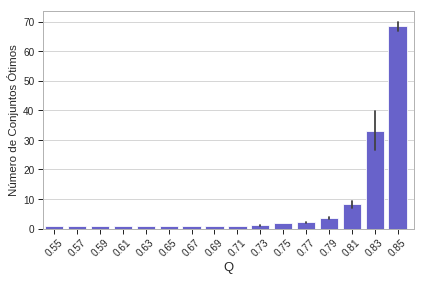

In [267]:
fig, ax = plt.subplots()
sns.barplot(x='cut_midpoint', y = 'ops', data = df_main.drop(['mu00/net05', 'mu00/net01', 'mu00/net02', 'mu00/net04']),
            color=newblue, saturation=0.5, errwidth=1.8)
#df_main.drop(['mu00/net05', 'mu00/net01', 'mu00/net02', 'mu00/net04'])

ax.set_xlim([0.5, 16.7])
#set_other_plot_default_stuff(ax)
#ax.grid()

#ax.legend(fontsize = 11,frameon = True, markerscale = 1)
ax.set_axisbelow(True)

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
    
ax.xaxis.label.set_size(13)
ax.yaxis.label.set_size(11.5)

xtlabel = sorted(set(np.round(df_main['cut_midpoint'],2)))
ax.set_xticklabels(xtlabel,rotation=45 )

ax.set_xlabel('Q')
ax.set_ylabel('Número de Conjuntos Ótimos')

fig.tight_layout()
figname = 'figs_dissertacao/sets_otimos_super_strongoutliers.png'
fig.savefig(figname, dpi = 600)

In [264]:
df = df_main.sort_values(by="ops", ascending=False).drop(df_main.sort_values(by="ops", ascending=False).index[:4])

### Heurísticos com OP

In [270]:
df_main['HBA/OP'].sort_values()

names
mu00/net01    1.000
mu07/net06    1.000
mu07/net26    1.000
mu02/net42    1.000
mu02/net37    1.000
mu03/net23    1.000
mu07/net38    1.000
mu07/net03    1.000
mu01/net02    1.000
mu02/net40    1.000
mu00/net03    1.000
mu01/net26    1.000
mu07/net15    1.000
mu02/net43    1.000
mu07/net25    1.000
mu01/net14    1.000
mu01/net18    1.000
mu01/net15    1.000
mu07/net05    1.000
mu02/net46    1.000
mu07/net21    1.000
mu00/net04    1.000
mu07/net37    1.000
mu04/net04    1.012
mu02/net09    1.021
mu02/net41    1.026
mu02/net16    1.031
mu07/net16    1.034
mu02/net19    1.034
mu02/net33    1.036
              ...  
mu02/net36    1.400
mu01/net03    1.400
mu01/net22    1.400
mu03/net03    1.403
mu03/net18    1.418
mu03/net02    1.429
mu02/net04    1.439
mu02/net14    1.462
mu04/net13    1.508
mu02/net48    1.508
mu02/net03    1.524
mu02/net29    1.524
mu03/net09    1.525
mu03/net11    1.525
mu03/net13    1.533
mu02/net32    1.560
mu02/net15    1.578
mu01/net05    1.600
mu02/net44    

In [39]:
df_main_means = round(df_main.drop(['mu01/net13','mu01/net11']).groupby('cut_midpoint').mean(), 3)
df_main_std = round(df_main.drop(['mu01/net13','mu01/net11']).groupby('cut_midpoint').std(), 3)
df_main_std.fillna(0, inplace = True)
df_main_means['cut'] = df_main_means.index
df_main_std['cut'] = df_main_std.index

In [69]:
mean_roll = df_main_means.rolling(2).mean().dropna()
std_roll=df_main_std.rolling(2).mean().dropna()

In [151]:
def varRation(df, groupby, x, y):
    
    groups = df.groupby(groupby).groups
    res = []
    for g in groups:
        newx = df.loc[groups[g]][x]
        newy = df.loc[groups[g]][y]
        
        var = np.mean(newx**2) * np.mean(newy**(-2)) - (np.mean(newx)/np.mean(newy))**2
        std = (( var )**(1/2))
        
        res.append(std)
    
    return res

0.7400000000000002
0.7800000000000002
0.8000000000000003


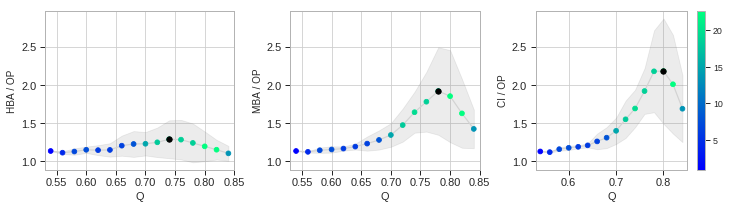

In [110]:
#fig, ax = plt.subplots(1,3, figsize = (12,3))
fig = plt.figure(figsize=(12,3))

yn = ['HBA', 'MBA', 'CI']

color2 = 'black'
# color1 = c[3]
color1 = 'lightgrey'

for i,y in enumerate(yn):
    if i == 0:
        ax = fig.add_subplot(1,len(yn),i+1)
    else: 
        ax = fig.add_subplot(1,len(yn),i+1, sharey=ax)
    
    ax.set_ylabel(y + ' / OP', fontsize = 10)
    ax.set_xlabel('Q', fontsize = 11)

    std = std_roll[y + '/OP']
    y = round(mean_roll[y + '/OP'],3)
    
    pl = ax.scatter(mean_roll.cut, y, c= mean_roll.n, cmap = cm,zorder=2)
    ax.plot(mean_roll.cut, y, color = color1,zorder=1)
    ax.fill_between(mean_roll.cut, y-std, y+std, color
                    = 'grey', alpha=0.15, label = "_nolegend_")
    
        
    for tickx, ticky in zip(ax.xaxis.get_major_ticks(), ax.yaxis.get_major_ticks()):
            tickx.label.set_fontsize(11)
            ticky.label.set_fontsize(11)
    
    ax.set_xlim([0.53,0.85])

    ax.scatter(float(mean_roll['cut'][(y == max(y))]), max(y), color=color2, zorder=3, s = 30)
    print(float(mean_roll['cut'][(y == max(y))]))
fig.tight_layout()
plt.subplots_adjust(right=0.85)
plt.colorbar(pl)
#fig.savefig('figs_dissertacao/heurs_op_cmap.png', dpi=600)



In [51]:
df_main_means['n'] = df_main.groupby('cut_midpoint').count()['Q']

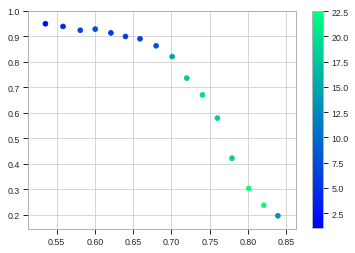

In [82]:
cm = plt.cm.get_cmap('winter')
#plt.errorbar(mean_roll.Q, mean_roll['HBA'], xerr=std_roll['Q'], yerr=std_roll['HBA'], linewidth=0, elinewidth=1, zorder=1)
plot = plt.scatter(mean_roll.Q, mean_roll['HBA'], c= mean_roll.n, cmap = cm)

plt.colorbar(plot)

plt.show()

In [80]:
mean_roll

,Q,OP,Average,AV/OP,MBA,HBA,CI,HBA/OP,MBA/OP,CI/OP,ops,cut,n
cut_midpoint,,,,,,,,,,,,,
0.55,0.5355,0.8400,0.9480,1.1295,0.9500,0.9500,0.9450,1.1320,1.1320,1.1260,1.0000,0.54,1.0
0.57,0.5585,0.8460,0.9480,1.1210,0.9480,0.9395,0.9450,1.1105,1.1210,1.1175,1.0000,0.56,4.5
0.59,0.5810,0.8220,0.9480,1.1535,0.9380,0.9245,0.9500,1.1250,1.1420,1.1565,1.0000,0.58,7.0
0.61,0.6005,0.8095,0.9475,1.1715,0.9310,0.9290,0.9490,1.1485,1.1515,1.1735,1.0000,0.60,7.5
0.63,0.6210,0.8000,0.9460,1.1835,0.9310,0.9140,0.9490,1.1425,1.1640,1.1870,1.0000,0.62,6.0
0.65,0.6400,0.7855,0.9455,1.2050,0.9345,0.9000,0.9465,1.1465,1.1900,1.2060,1.0000,0.64,6.0
0.67,0.6590,0.7465,0.9435,1.2710,0.9135,0.8910,0.9340,1.2015,1.2285,1.2585,1.0000,0.66,6.5
0.69,0.6800,0.7110,0.9415,1.3315,0.9025,0.8635,0.9235,1.2235,1.2770,1.3070,1.0000,0.68,8.0
0.71,0.7010,0.6715,0.9405,1.4240,0.8930,0.8210,0.9230,1.2270,1.3425,1.3970,1.0000,0.70,15.0
